<a href="https://colab.research.google.com/github/kelgruber/bear-cnn-classification/blob/main/Kel_Gruber_Practice_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Project Task 6 Explore Off-the-Shelf Tools

Kel Gruber

## Dataset - Bears Classification
Goal is to classify images of grizzly, panda, and polar bears.
Dataset was created by Shaney Flores and consists of over 1000 digital colored images of grizzly, panda, and polar bears were downloaded from an Internet image search.
Dataset can be found and downloaded from [Shaney Flores's Github](https://github.com/shaneyflores/Classifying-Bear-Species-DL/blob/main/bears_ws.zip).

##1. Load Dataset
For reproducibility the dataset has been split before we begin into 3 sets, the training, validation and testing sets. The training set contains approximately 60% of the data, and the validation and testing sets each contain 20% of the data.

### Import libaries and connect to Drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Bears Classification/bears_ws.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training, Validation, and Testing Datasets

The Teachable Machines model suggested code for using the model indicates that the model normalizes the data differently that our prior models. This model suggests you normalize the pixel values to be between [-1,1] instead of [0,1] which was used in the prior models.

In [ ]:
#Teachable Machines normalizes this way: normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
#this should have the image generator do the same
image_generator = ImageDataGenerator(rescale=1./127.5, featurewise_center=True, featurewise_std_normalization=False)

training_data = image_generator.flow_from_directory( '/tmp/bears/training', target_size=(224, 224), batch_size=1, class_mode='categorical')
print(training_data.image_shape)

validation_set = image_generator.flow_from_directory( '/tmp/bears/validation', target_size=(224, 224), batch_size=1, class_mode='categorical')
print(validation_set.image_shape)

testing_set = image_generator.flow_from_directory( '/tmp/bears/test', target_size=(224, 224), batch_size=1, class_mode='categorical')
print(testing_set.image_shape)

Found 718 images belonging to 3 classes.
(224, 224, 3)
Found 240 images belonging to 3 classes.
(224, 224, 3)
Found 240 images belonging to 3 classes.
(224, 224, 3)


###View Some Examples from the Training Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

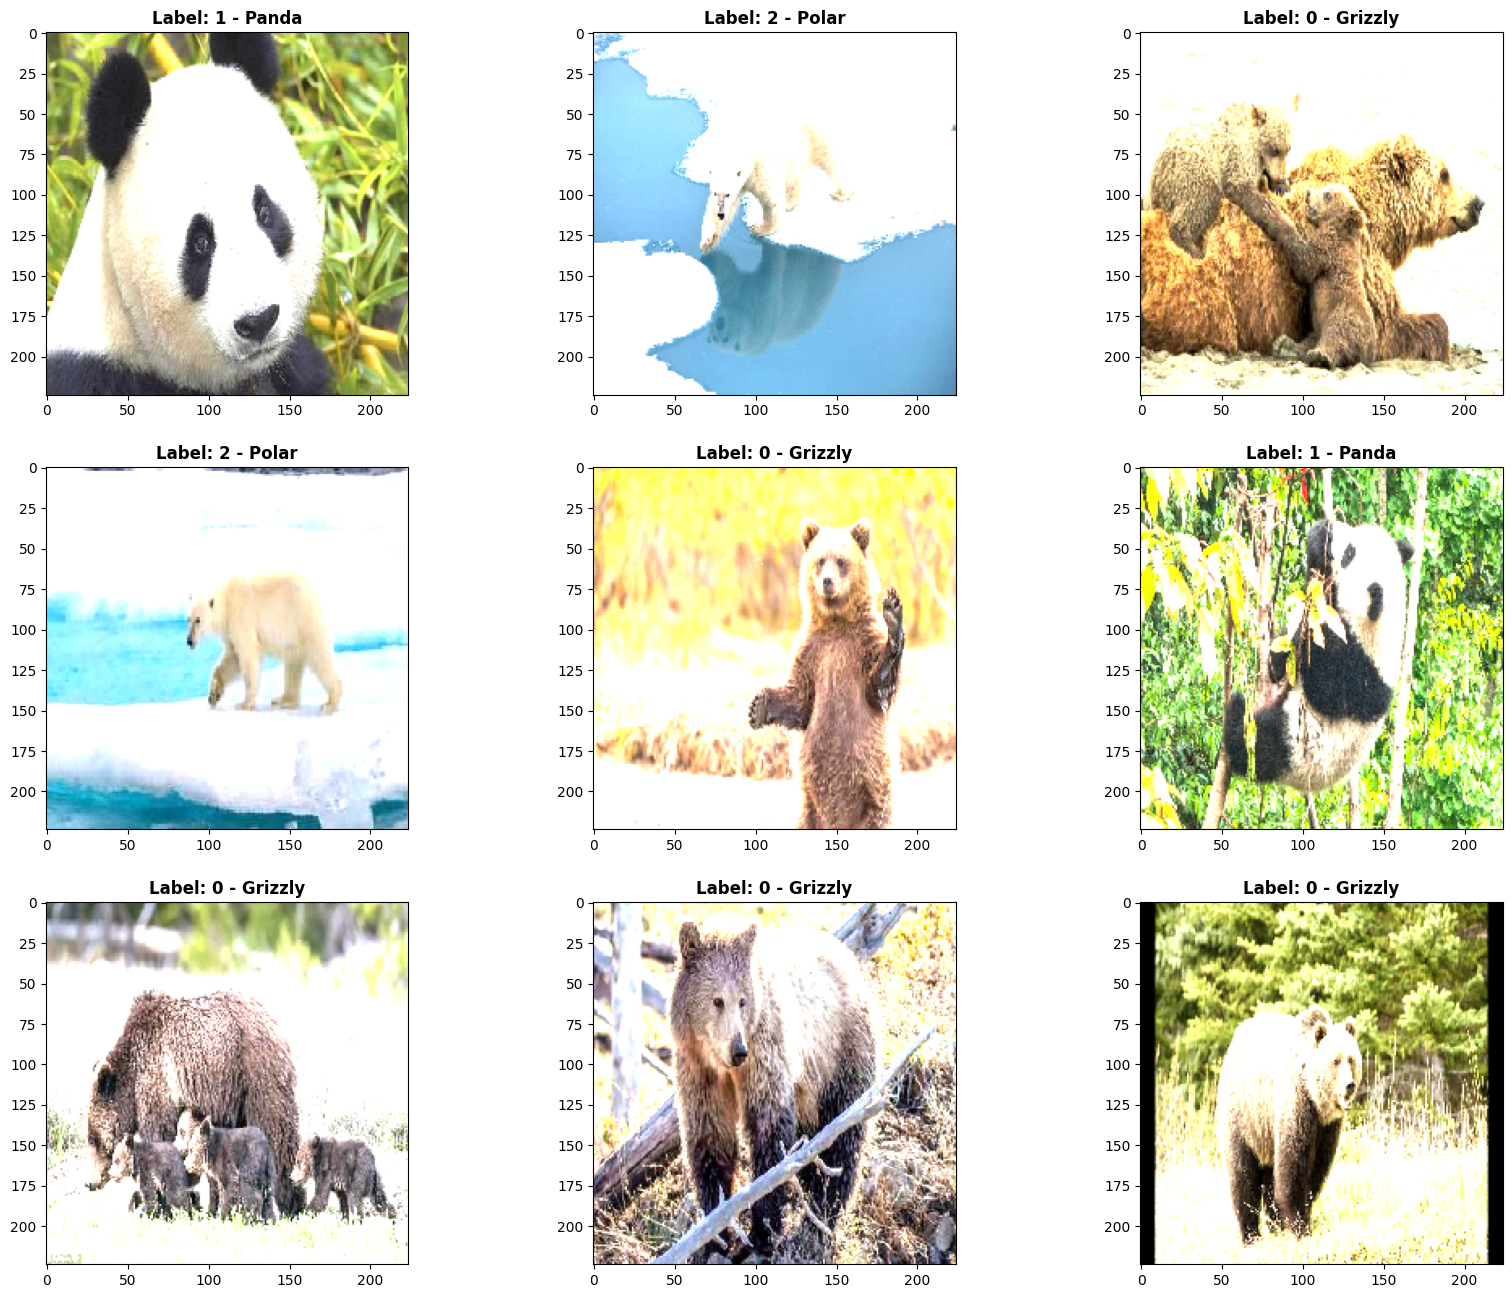

In [ ]:
label_category = {0: "Grizzly", 1: "Panda", 2: "Polar"}

images = []
labels = []
for i in range(9):
    image, label = next(training_data)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(20,16))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

The images look different in this view because Teachable Machine uses a different preprocessing technique where the images are normalized to be between [-1, 1] instead of [0,1].

##2. Models Built Using Off the Shelf Tools

####2.1 Teachable Machines Model

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 3)                 128400    
                                                                 
Total params: 538608 (2.05 MB)
Trainable params: 524528 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


#####Evaluate Model on the Training Data
This is the data that was uploaded to the Teachable Machines website for training. It is interesting in this test that the model does not get nearly 100% accuracy because according to the Teachable Machines website this model has nearly 100% accuracy per class on the training data. I am wondering if I did not prepare the data exactly that same way as the model did since I am using an image generator to load and normalize instead of a numpy array as suggested by the website.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
P = [] # empty list of predictions
Y_true = []

for i in range(len(training_data)):
   x, y = training_data.next()
   p = model.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = pred = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9025069637883009
Precision: 0.917250403166691
Recall: 0.9025069637883009
F1 Score: 0.9023999679618121


#####Evaluate Model on the Validation Set

*Please note that this set was not uploaded to Teachable Machines for training. This is essentially a testing set with unknown data that the model has never seen.

In [ ]:
P = [] # empty list of predictions
Y_true = []

for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = pred = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8958333333333334
Precision: 0.9191754752272826
Recall: 0.8958333333333334
F1 Score: 0.8983395357079568


#####Evaluate Model on the Testing Set

*Please note that this set was not uploaded to Teachable Machines for training. This is data that the model has not seen.

In [ ]:
P = [] # empty list of predictions
Y_true = []

for i in range(len(validation_set)):
   x, y = testing_set.next()
   p = model.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = pred = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9041666666666667
Precision: 0.9185057997557997
Recall: 0.9041666666666667
F1 Score: 0.9044307677796641
